In [ ]:
#K·∫øt N·ªëi Colab v·ªõi Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Th∆∞ vi·ªán

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install scikit_learn
!pip install scipy
!pip install pandas
!pip install ipywidgets
!pip install seaborn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# C√°c lo·∫°i ph√¢n c·ª•m:
* **Ph√¢n c·ª•m d·ª±a tr√™n centroid**: Lo·∫°i thu·∫≠t to√°n ph√¢n c·ª•m n√†y h√¨nh th√†nh xung quanh tr·ªçng t√¢m c·ªßa c√°c ƒëi·ªÉm d·ªØ li·ªáu. V√≠ d·ª•: Ph√¢n c·ª•m K-Means , ph√¢n c·ª•m K-Mode
* **Ph√¢n c·ª•m d·ª±a tr√™n ph√¢n ph·ªëi** : Lo·∫°i thu·∫≠t to√°n ph√¢n c·ª•m n√†y ƒë∆∞·ª£c m√¥ h√¨nh h√≥a b·∫±ng ph√¢n ph·ªëi th·ªëng k√™. N√≥ gi·∫£ ƒë·ªãnh r·∫±ng c√°c ƒëi·ªÉm d·ªØ li·ªáu trong m·ªôt c·ª•m ƒë∆∞·ª£c t·∫°o t·ª´ m·ªôt ph√¢n b·ªë x√°c su·∫•t c·ª• th·ªÉ v√† thu·∫≠t to√°n nh·∫±m m·ª•c ƒë√≠ch ∆∞·ªõc t√≠nh c√°c tham s·ªë c·ªßa ph√¢n ph·ªëi ƒë·ªÉ nh√≥m c√°c ƒëi·ªÉm d·ªØ li·ªáu t∆∞∆°ng t·ª± th√†nh c√°c c·ª•m V√≠ d·ª•: M√¥ h√¨nh h·ªón h·ª£p Gaussian (GMM)
* **Ph√¢n c·ª•m d·ª±a tr√™n m·∫≠t ƒë·ªô**: Lo·∫°i thu·∫≠t to√°n ph√¢n c·ª•m n√†y nh√≥m c√°c ƒëi·ªÉm d·ªØ li·ªáu c√≥ n·ªìng ƒë·ªô m·∫≠t ƒë·ªô cao l·∫°i v·ªõi nhau v√† ph√¢n t√°ch c√°c ƒëi·ªÉm ·ªü c√°c v√πng c√≥ n·ªìng ƒë·ªô th·∫•p. √ù t∆∞·ªüng c∆° b·∫£n l√† n√≥ x√°c ƒë·ªãnh c√°c v√πng trong kh√¥ng gian d·ªØ li·ªáu c√≥ m·∫≠t ƒë·ªô ƒëi·ªÉm d·ªØ li·ªáu cao v√† nh√≥m c√°c ƒëi·ªÉm ƒë√≥ l·∫°i v·ªõi nhau th√†nh c√°c c·ª•m. V√≠ d·ª•: DBSCAN(Ph√¢n c·ª•m kh√¥ng gian d·ª±a tr√™n m·∫≠t ƒë·ªô c√°c ·ª©ng d·ª•ng c√≥ nhi·ªÖu).

* **Ph√¢n c·ª•m theo c·∫•p b·∫≠c**: m√¥ h√¨nh ph√¢n c·ª•m d·ª±a tr√™n k·∫øt n·ªëi, nh√≥m c√°c ƒëi·ªÉm d·ªØ li·ªáu g·∫ßn nhau d·ª±a tr√™n th∆∞·ªõc ƒëo ƒë·ªô t∆∞∆°ng t·ª± ho·∫∑c kho·∫£ng c√°ch. Gi·∫£ ƒë·ªãnh l√† c√°c ƒëi·ªÉm d·ªØ li·ªáu g·∫ßn nhau th√¨ gi·ªëng nhau ho·∫∑c c√≥ li√™n quan h∆°n so v·ªõi c√°c ƒëi·ªÉm d·ªØ li·ªáu ·ªü xa nhau h∆°n.

# K-means Clustering

**C√°ch th·ª±c hi·ªán**
*  B∆∞·ªõc 1: Ch·ªçn K l√† s·ªë l∆∞·ª£ng cluster c·∫ßn t√¨m.
*  B∆∞·ªõc 2: Ch·ªçn K ƒëi·ªÉm b·∫•t k·ª≥ l√†m c√°c center ban ƒë·∫ßu.
*  B∆∞·ªõc 3: Ph√¢n m·ªói ƒëi·ªÉm d·ªØ li·ªáu v√†o cluster c√≥ center g·∫ßn n√≥ nh·∫•t.
*  B∆∞·ªõc 4: N·∫øu vi·ªác g√°n d·ªØ li·ªáu v√†o t·ª´ng cluster ·ªü b∆∞·ªõc 3 kh√¥ng thay ƒë·ªïi so v·ªõi v√≤ng l·∫∑p tr∆∞·ªõc n√≥ th√¨ ta d·ª´ng thu·∫≠t to√°n.
*  B∆∞·ªõc 5: C·∫≠p nh·∫≠t center cho t·ª´ng cluster b·∫±ng c√°ch l·∫•y trung b√¨nh c·ªông c·ªßa t·∫•t c√°c c√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c g√°n v√†o cluster ƒë√≥ sau b∆∞·ªõc 3.
*  B∆∞·ªõc 6: Quay l·∫°i b∆∞·ªõc 3.

In [ ]:
#T·∫°o data b·∫±ng c√°ch l·∫•y c√°c ƒëi·ªÉm theo ph√¢n ph·ªëi chu·∫©n c√≥ k·ª≥ v·ªçng t·∫°i c√°c ƒëi·ªÉm c√≥ t·ªça ƒë·ªô (2, 2), (8, 3) v√† (3, 6), ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai gi·ªëng nhau v√† l√† ma tr·∫≠n ƒë∆°n v·ªã.
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 400
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

Data = np.concatenate((X0, X1, X2), axis = 0)

In [ ]:
Data

array([[2.12652733, 2.08206252],
       [3.13222025, 1.70238825],
       [1.98008334, 1.61750334],
       ...,
       [3.26756802, 4.48805069],
       [3.2659614 , 6.47537932],
       [1.54078936, 5.15814668]])

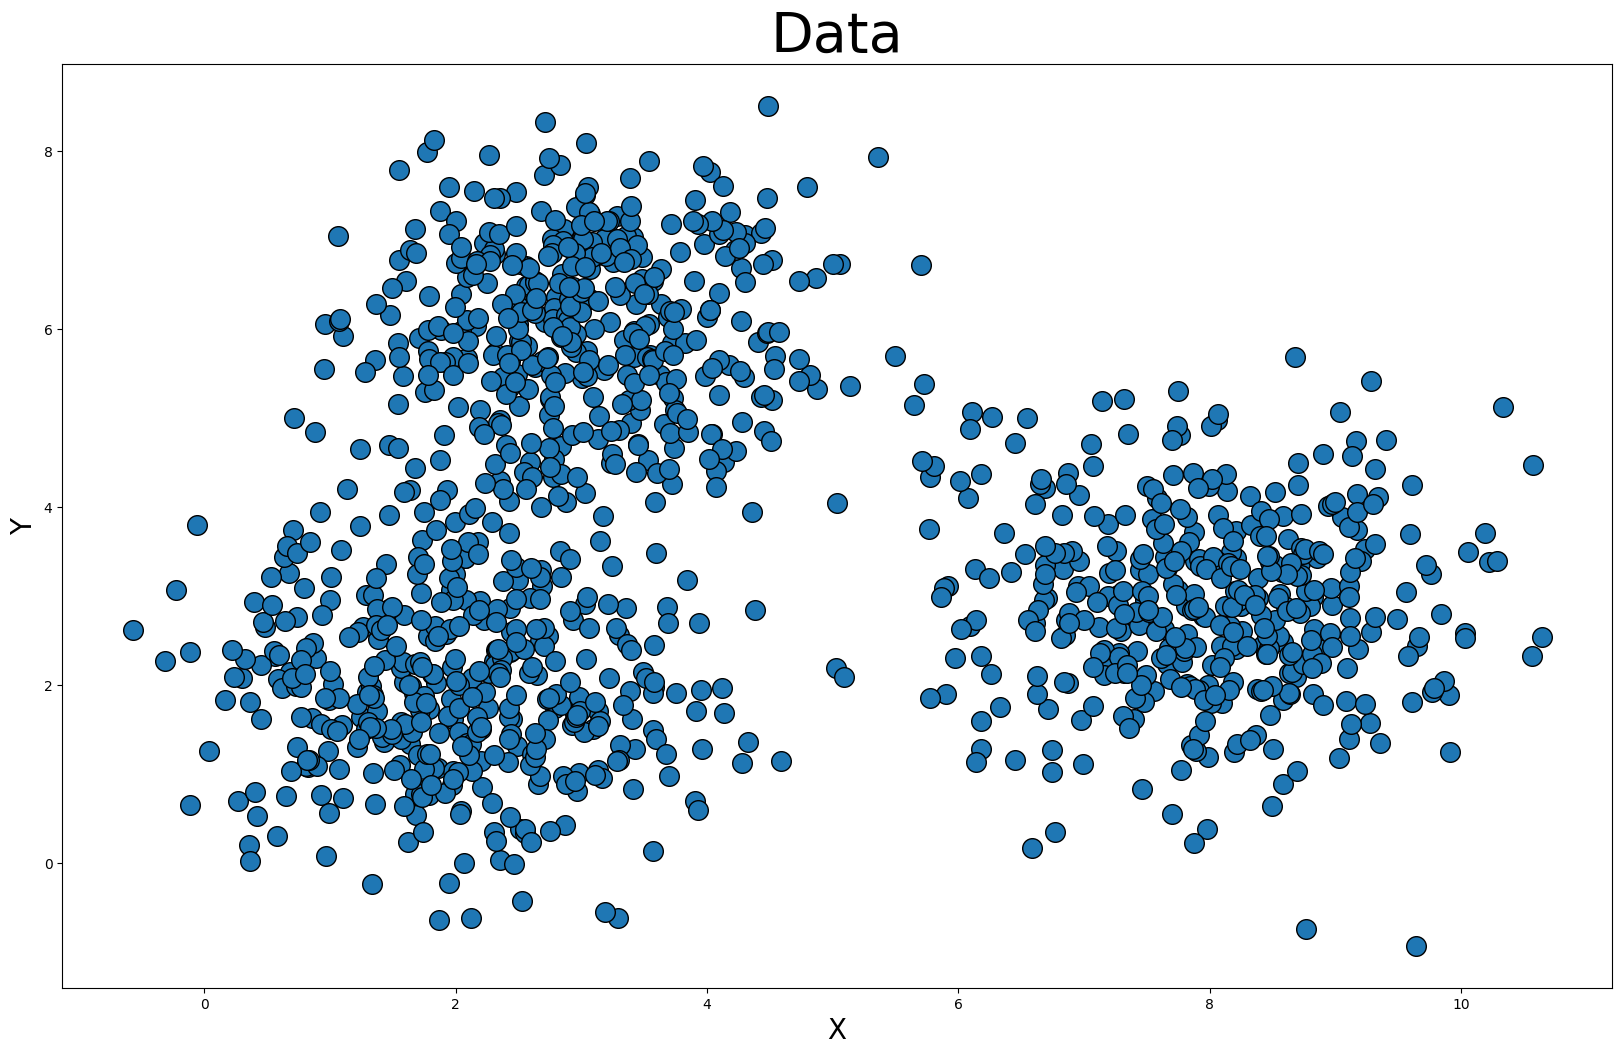

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    Data[:, 0], Data[:, 1],
    marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("Data", fontsize=40)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_pred =kmeans.fit_predict(Data)
centers=kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


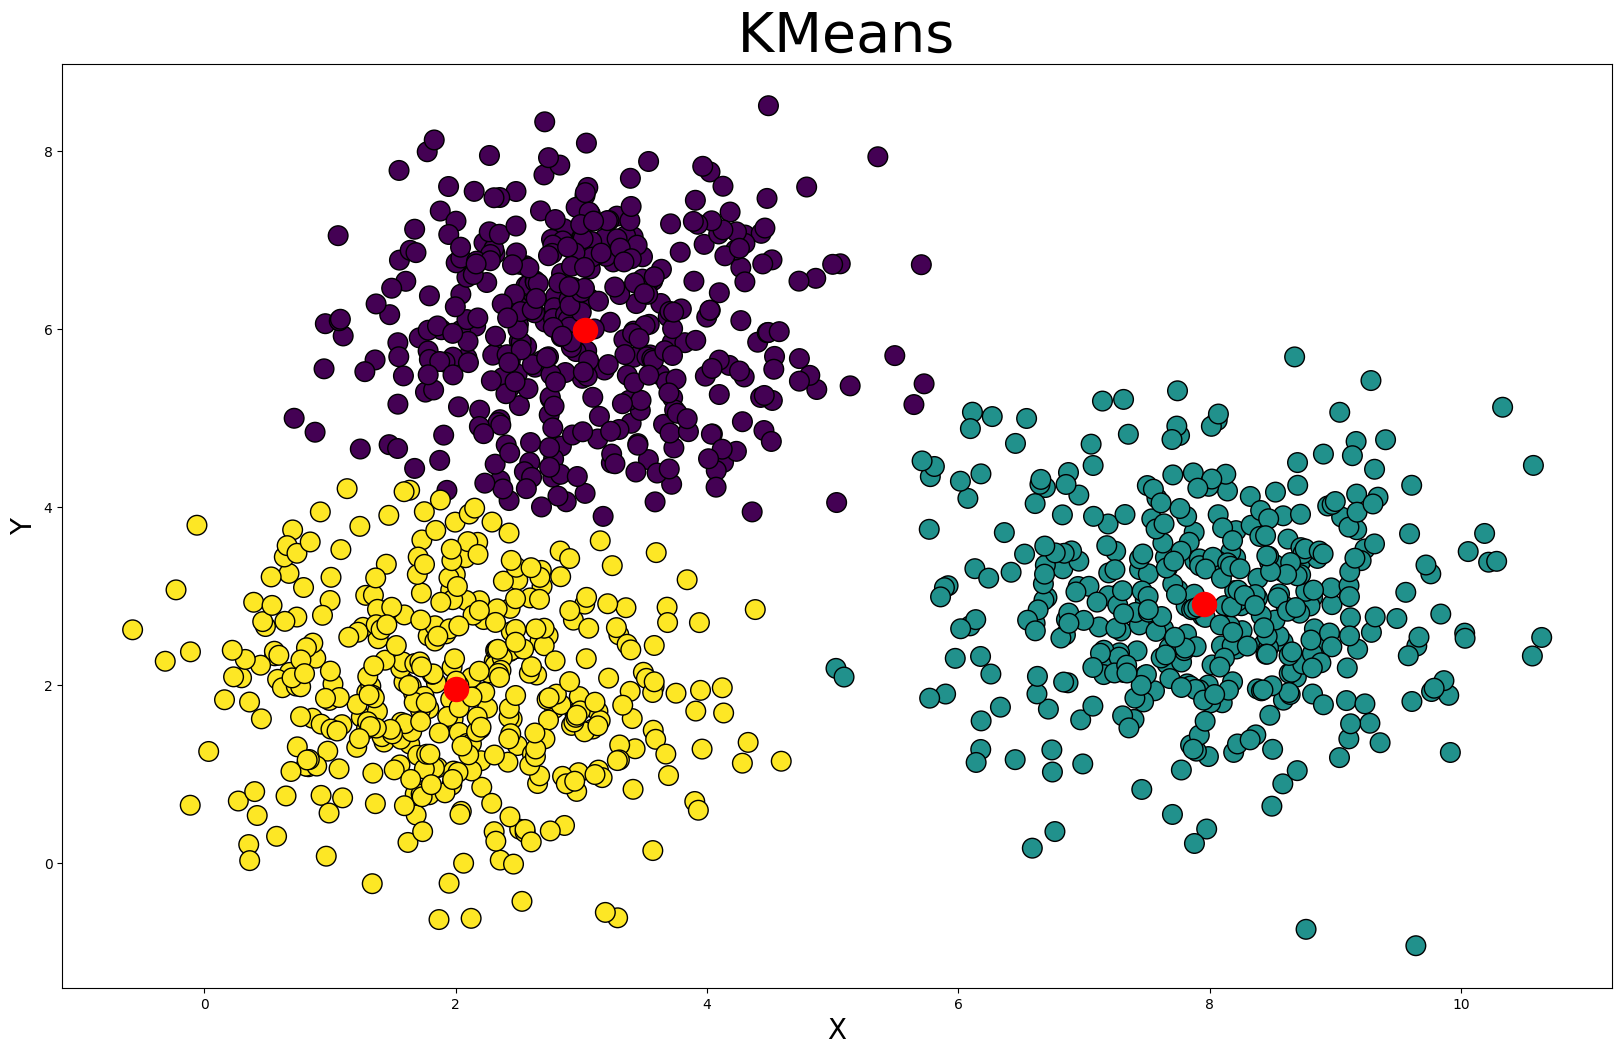

In [ ]:
# Show k·∫øt qu·∫£ ph√¢n c·ª•m
plt.figure(figsize=(20,12))
plt.scatter(
    Data[:, 0], Data[:, 1],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300)
plt.title(" KMeans", fontsize=40)
plt.show()

**H·∫°n ch·∫ø c·ªßa Kmeans**
* Ch√∫ng ta c·∫ßn bi·∫øt s·ªë l∆∞·ª£ng cluster c·∫ßn clustering
* Nghi·ªám cu·ªëi c√πng ph·ª• thu·ªôc v√†o c√°c centers ƒë∆∞·ª£c kh·ªüi t·∫°o ban ƒë·∫ßu
---

#### Ph∆∞∆°ng ph√°p Elbow cho gi√° tr·ªã t·ªëi ∆∞u c·ªßa k trong KMeans

Distorsion: Trung b√¨nh c·ªông b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch gi·ªØa t√¢m c·ª•m ƒë·∫øn c√°c ƒëi·ªÉm c√≤n l·∫°i.

M·ªôt m√¥ h√¨nh t·ªët l√† m√¥ h√¨nh c√≥ gi√° tr·ªã distorsion th·∫•p v√† s·ªë l∆∞·ª£ng c·ª•m ph√π h·ª£p. Tuy nhi√™n, khi s·ªë l∆∞·ª£ng c·ª•m qu√° l·ªõn, gi√° tr·ªã distorsion c√≥ th·ªÉ kh√¥ng gi·∫£m nhi·ªÅu n·ªØa ho·∫∑c th·∫≠m ch√≠ tƒÉng l√™n do s·ª± ph√¢n t√°n c·ªßa c√°c ƒëi·ªÉm d·ªØ li·ªáu trong m·ªói c·ª•m. Do ƒë√≥, ƒë·ªÉ t√¨m m·ªôt m√¥ h√¨nh t·ªët, ch√∫ng ta c·∫ßn t√¨m m·ªôt s·ª± c√¢n b·∫±ng gi·ªØa gi√° tr·ªã distorsion v√† s·ªë l∆∞·ª£ng c·ª•m ph√π h·ª£p cho b·ªô d·ªØ li·ªáu.

Ch·ªçn s·ªë c·ª•m h·ª£p l√Ω b·∫±ng c√°ch: ch·ªçn ƒëi·ªÉm m√† ƒë·ªô gi·∫£m distorsion b·∫Øt ƒë·∫ßu ch·∫≠m l·∫°i.

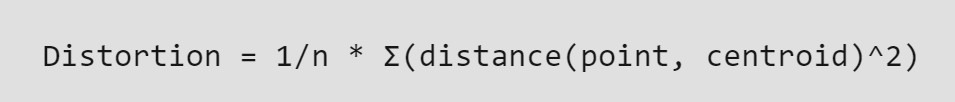

In [ ]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data[:,[0, 1]])
    distorsions.append(kmeans.inertia_)

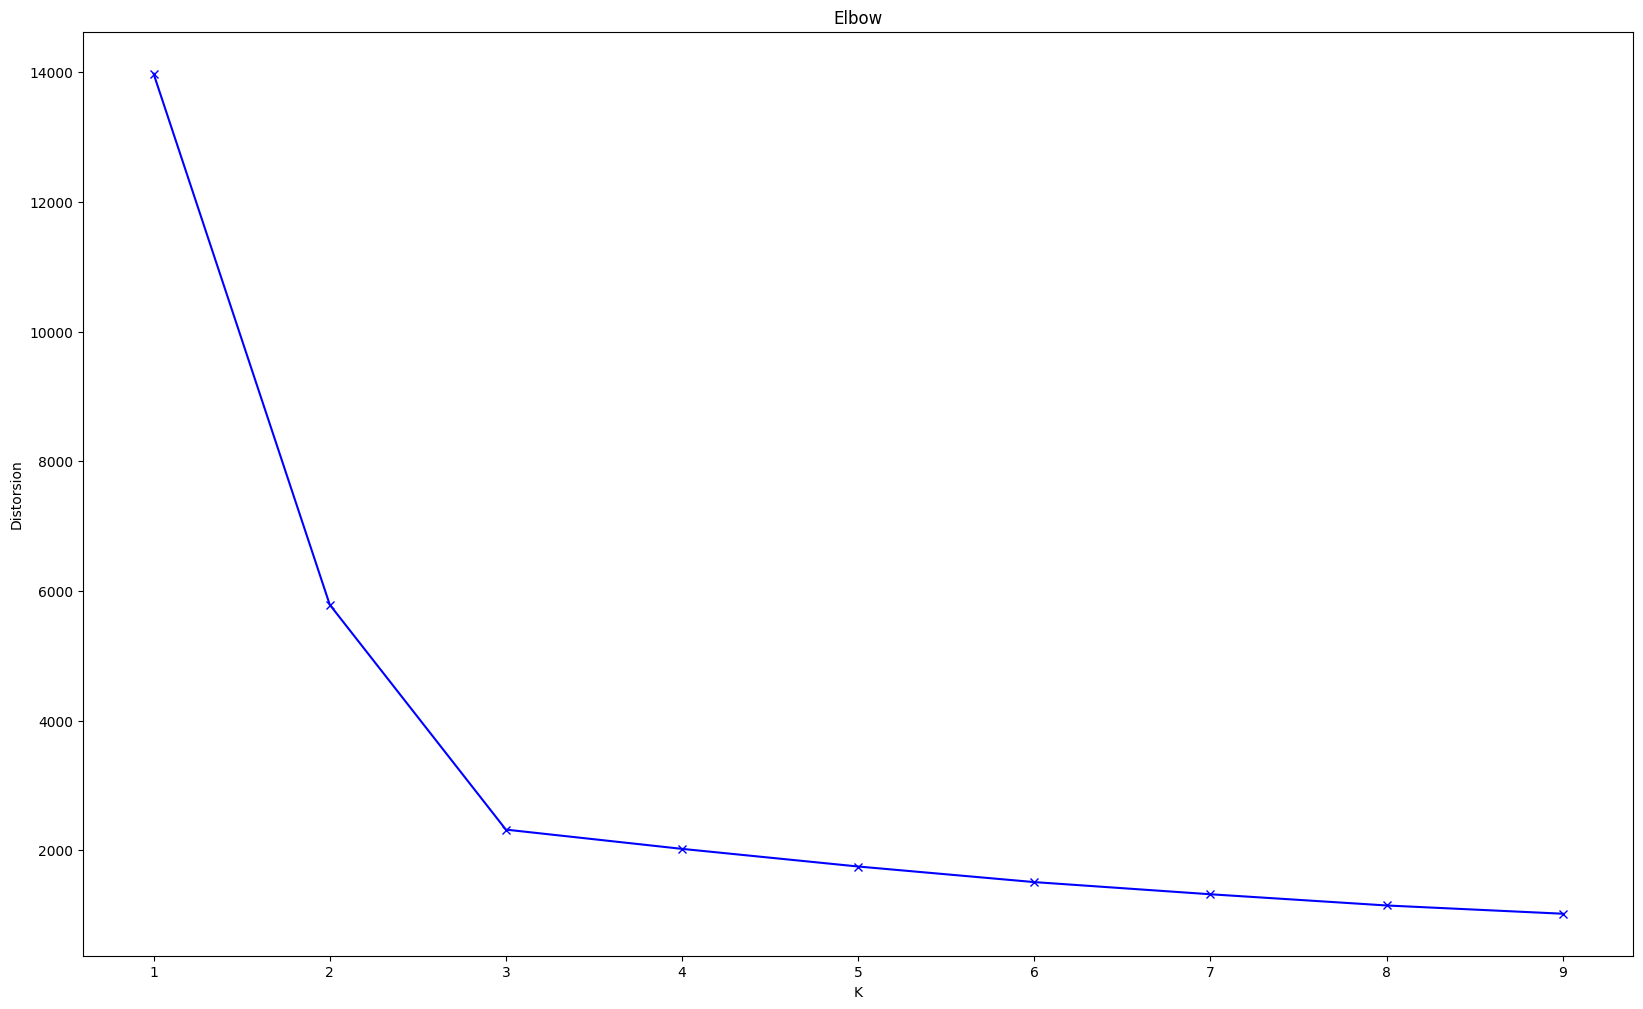

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(1,10),distorsions,'bx-')
plt.xlabel("K")
plt.ylabel("Distorsion")
plt.title("Elbow")
plt.show()

#### Silhouette coefficient

Silhouette_score =  (b-a)/max(a,b)

a: trung b√¨nh kho·∫£ng c√°ch t·ª´ ƒëi·ªÉm hi·ªán t·∫°i ƒë·∫øn t·∫•t c·∫£ c√°c ƒëi·ªÉm c√≤n l·∫°i trong cluster

b: trung b√¨nh kho·∫£ng c√°ch t·ª´ ƒëi·ªÉm hi·ªán t·∫°i ƒë·∫øn t·∫•t c·∫£ c√°c ƒëi·ªÉm ·ªü trong cluster g·∫ßn nh·∫•t

In [ ]:
print(metrics.silhouette_score(Data,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  y_pred = kmeans.fit_predict(Data)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(Data, y_pred))



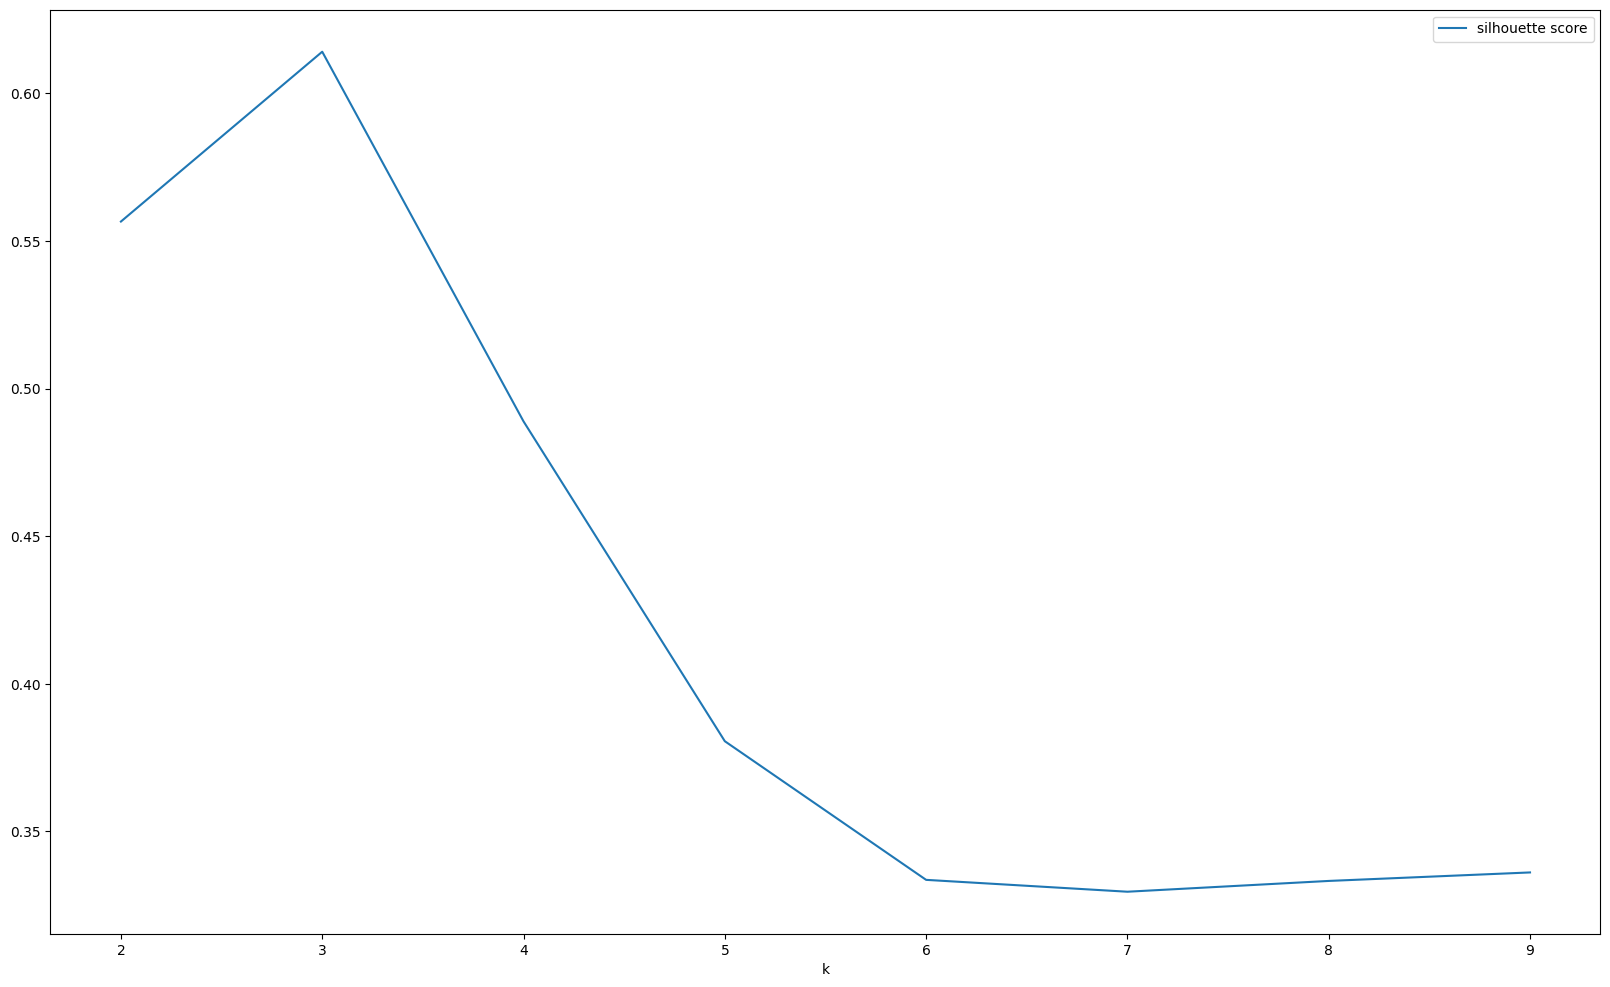

In [ ]:
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

#  DBSCAN

eps : N√≥ x√°c ƒë·ªãnh v√πng l√¢n c·∫≠n xung quanh m·ªôt ƒëi·ªÉm d·ªØ li·ªáu, t·ª©c l√† n·∫øu kho·∫£ng c√°ch gi·ªØa hai ƒëi·ªÉm nh·ªè h∆°n ho·∫∑c b·∫±ng 'eps' th√¨ ch√∫ng ƒë∆∞·ª£c coi l√† h√†ng x√≥m. N·∫øu gi√° tr·ªã eps ƒë∆∞·ª£c ch·ªçn qu√° nh·ªè th√¨ ph·∫ßn l·ªõn d·ªØ li·ªáu s·∫Ω ƒë∆∞·ª£c coi l√† ngo·∫°i l·ªá. N·∫øu n√≥ ƒë∆∞·ª£c ch·ªçn r·∫•t l·ªõn th√¨ c√°c c·ª•m s·∫Ω h·ª£p nh·∫•t v√† ph·∫ßn l·ªõn c√°c ƒëi·ªÉm d·ªØ li·ªáu s·∫Ω n·∫±m trong c√πng m·ªôt c·ª•m. M·ªôt c√°ch ƒë·ªÉ t√¨m gi√° tr·ªã eps d·ª±a tr√™n k-distance graph.

MinPts : S·ªë l√¢n c·∫≠n t·ªëi thi·ªÉu (ƒëi·ªÉm d·ªØ li·ªáu) trong b√°n k√≠nh eps. T·∫≠p d·ªØ li·ªáu c√†ng l·ªõn th√¨ ph·∫£i ch·ªçn gi√° tr·ªã MinPts c√†ng l·ªõn. Gi√° tr·ªã t·ªëi thi·ªÉu c·ªßa MinPts ph·∫£i ƒë∆∞·ª£c ch·ªçn √≠t nh·∫•t l√† 3.


min_samples : L√† MinPts nh∆∞ng t√≠nh ƒëi·ªÉm ·ªü t√¢m

In [ ]:
#Doc file data
data = pd.read_csv("/content/drive/MyDrive/clustering/data/spiral.txt", sep="\t", header=None)
data_arr = np.array(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = data.iloc[:, 0:2].values
std = MinMaxScaler()
X_std = std.fit_transform(X)

In [ ]:
X.shape

(312, 2)

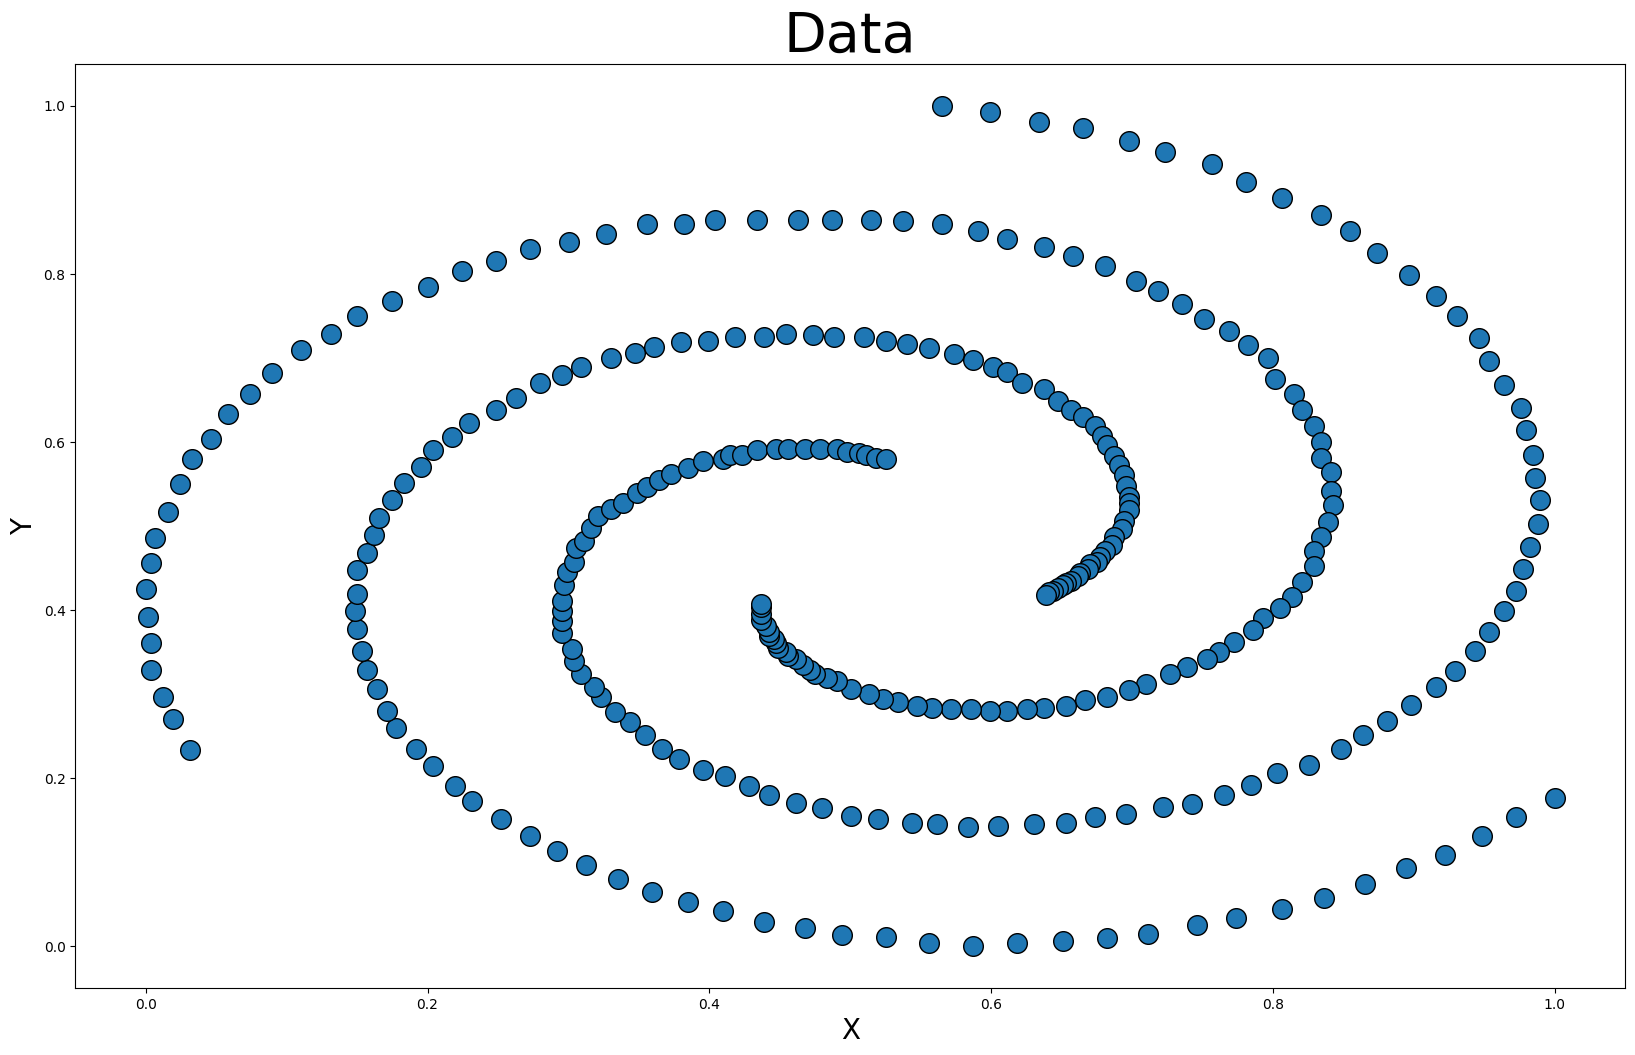

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    X_std[:, 0], X_std[:, 1],
     marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("Data", fontsize=40)
plt.show()

In [ ]:
db = DBSCAN(eps=0.07, min_samples=5).fit(X_std)
y_pred_DB = db.fit_predict(X_std)


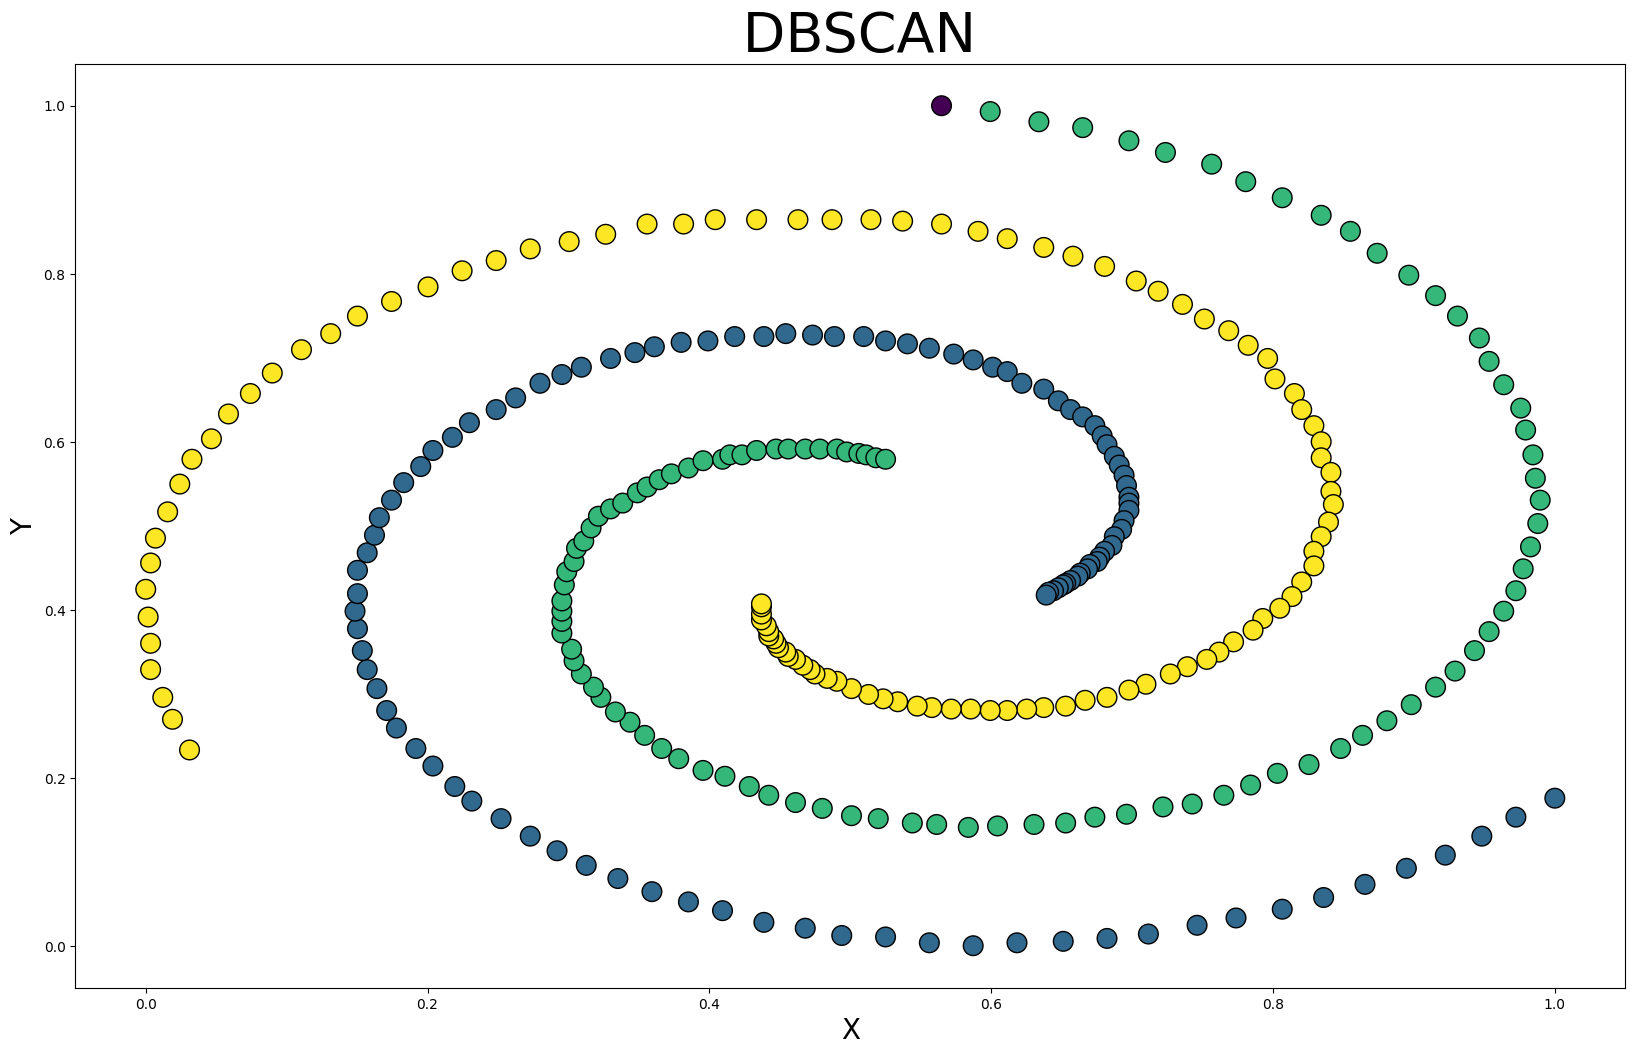

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    X_std[:, 0], X_std[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title(" DBSCAN", fontsize=40)
plt.show()

**Bi·ªÉu ƒë·ªì k-distance**

 ƒê√¢y l√† bi·ªÉu ƒë·ªì th·ªÉ hi·ªán gi√° tr·ªã kho·∫£ng c√°ch trong thu·∫≠t to√°n k-Means clustering ƒë·∫øn k ƒëi·ªÉm l√°ng gi·ªÅng g·∫ßn nh·∫•t.

 ·ª®ng v·ªõi m·ªói ƒëi·ªÉm ch√∫ng ta ch·ªâ l·ª±a ch·ªçn ra kho·∫£ng c√°ch l·ªõn nh·∫•t trong k
 kho·∫£ng c√°ch. Nh·ªØng kho·∫£ng c√°ch n√†y tr√™n ƒë·ªì th·ªã ƒë∆∞·ª£c s·∫Øp x·∫øp theo th·ª© t·ª± gi·∫£m d·∫ßn. C√°c gi√° tr·ªã t·ªët c·ªßa epsilon l√† v·ªã tr√≠ m√† bi·ªÉu ƒë·ªì n√†y cho th·∫•y xu·∫•t hi·ªán m·ªôt ƒëi·ªÉm khu·ª∑ tay (elbow point):

 N·∫øu epsilon ƒë∆∞·ª£c ch·ªçn qu√° nh·ªè, m·ªôt ph·∫ßn l·ªõn d·ªØ li·ªáu s·∫Ω kh√¥ng ƒë∆∞·ª£c ph√¢n c·ª•m v√† ƒë∆∞·ª£c xem l√† nhi·ªÖu; trong khi ƒë·ªëi v·ªõi gi√° tr·ªã epsilon qu√° cao, c√°c c·ª•m s·∫Ω h·ª£p nh·∫•t v√† ph·∫ßn l·ªõn c√°c ƒëi·ªÉm s·∫Ω n·∫±m trong c√πng m·ªôt c·ª•m.

 N√≥i chung, c√°c gi√° tr·ªã nh·ªè c·ªßa epsilon ƒë∆∞·ª£c ∆∞u ti√™n h∆°n v√† theo quy t·∫Øc chung, ch·ªâ m·ªôt ph·∫ßn nh·ªè c√°c ƒëi·ªÉm n√™n n·∫±m trong v√πng l√¢n c·∫≠n epsilon.



Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

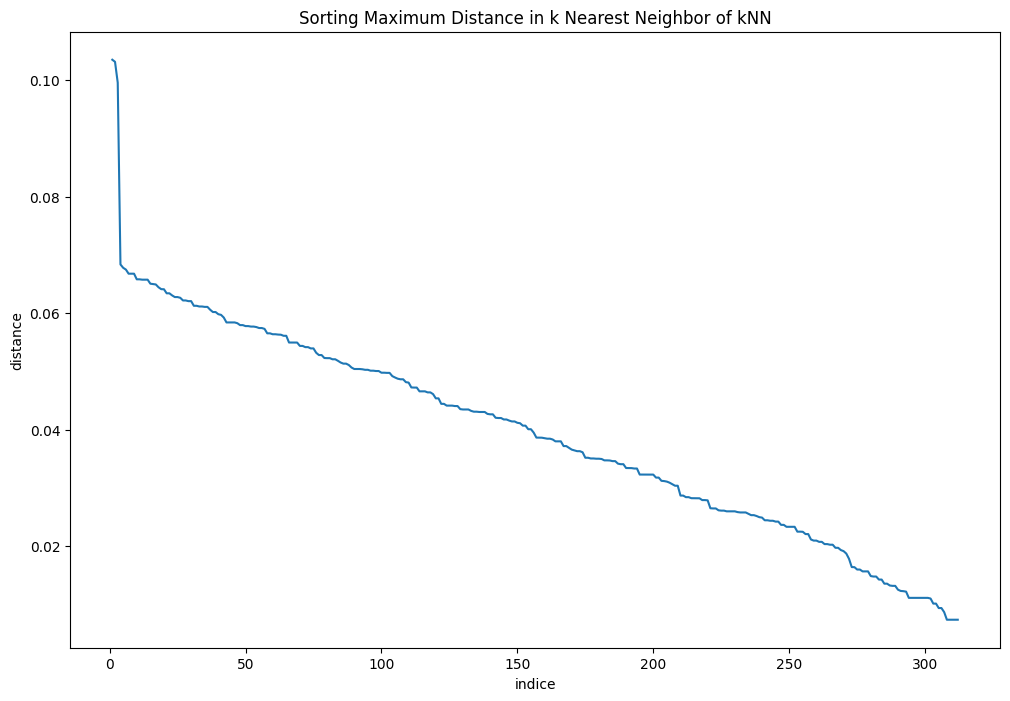

In [ ]:
from sklearn.neighbors import NearestNeighbors

# X√¢y d·ª±ng m√¥ h√¨nh k-Means v·ªõi k=5
neighbors = 4
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma tr·∫≠n kho·∫£ng c√°ch distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# L·∫•y ra kho·∫£ng c√°ch xa nh·∫•t t·ª´ ph·∫°m vi l√°ng gi·ªÅng c·ªßa m·ªói ƒëi·ªÉm v√† s·∫Øp x·∫øp theo th·ª© t·ª± gi·∫£m d·∫ßn.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# V·∫Ω bi·ªÉu ƒë·ªì kho·∫£ng c√°ch xa nh·∫•t ·ªü tr√™n theo th·ª© t·ª± gi·∫£m d·∫ßn
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

# Hierarchical Clustering (ph√¢n c·ª•m ph√¢n c·∫•p)

* Ph∆∞∆°ng ph√°p ph√¢n c·ª•m ph√¢n c·∫•p (Hierachical Clustering) kh√¥ng y√™u c·∫ßu khai b√°o tr∆∞·ªõc s·ªë l∆∞·ª£ng c·ª•m.
* Thu·∫≠t to√°n ch·ªâ y√™u c·∫ßu x√°c ƒë·ªãnh tr∆∞·ªõc th∆∞·ªõc ƒëo v·ªÅ s·ª± kh√°c bi·ªát gi·ªØa c√°c c·ª•m (kh√¥ng giao nhau), d·ª±a tr√™n s·ª± kh√°c bi·ªát t·ª´ng c·∫∑p gi·ªØa c√°c quan s√°t trong hai c·ª•m.
* Theo ph∆∞∆°ng ph√°p n√†y, ch√∫ng t·∫°o ra nh·ªØng bi·ªÉu di·ªÖn ph√¢n c·∫•p trong ƒë√≥ c√°c c·ª•m ·ªü m·ªói c·∫•p c·ªßa h·ªá th·ªëng ph√¢n c·∫•p ƒë∆∞·ª£c t·∫°o b·∫±ng c√°ch h·ª£p nh·∫•t c√°c c·ª•m ·ªü c·∫•p ƒë·ªô th·∫•p h∆°n b√™n d∆∞·ªõi.

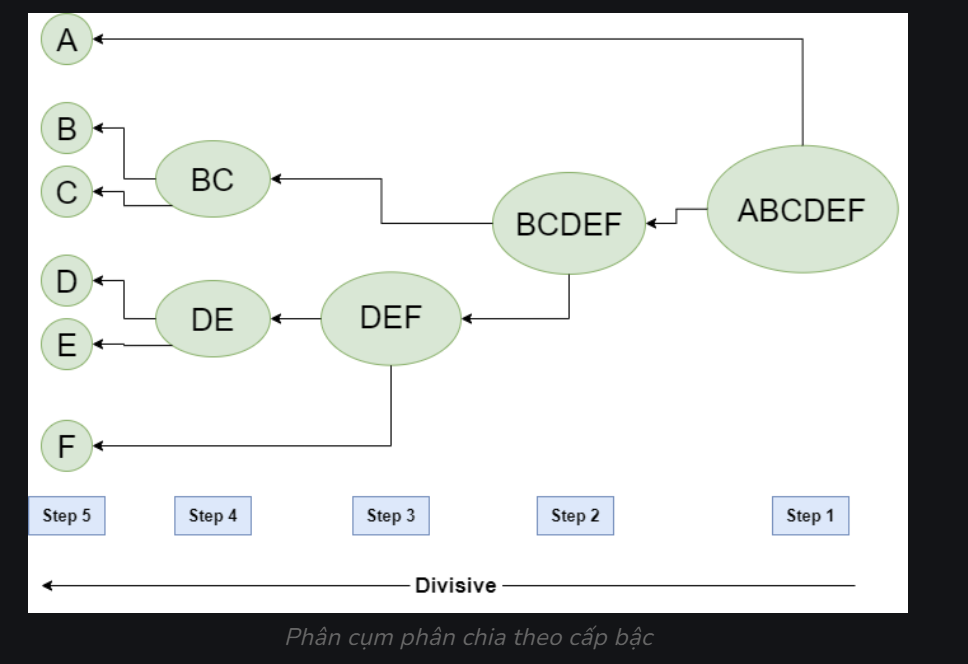

* Chi·∫øn l∆∞·ª£c h·ª£p nh·∫•t: Chi·∫øn l∆∞·ª£c n√†y s·∫Ω ƒëi theo chi·ªÅu bottum-up (t·ª´ d∆∞·ªõi l√™n tr√™n). Qu√° tr√¨nh ph√¢n c·ª•m b·∫Øt ƒë·∫ßu ·ªü d∆∞·ªõi c√πng t·∫°i c√°c node l√° (c√≤n g·ªçi l√† leaf node ho·∫∑c termial node). Ban d·∫ßu m·ªói quan s√°t s·∫Ω ƒë∆∞·ª£c xem l√† m·ªôt c·ª•m t√°ch bi·ªát ƒë∆∞·ª£c th·ªÉ hi·ªán b·ªüi m·ªôt node l√°. ·ªû m·ªói level ch√∫ng ta s·∫Ω t√¨m c√°ch h·ª£p m·ªôt c·∫∑p c·ª•m th√†nh m·ªôt c·ª•m duy nh·∫•t nh·∫±m t·∫°o ra m·ªôt c·ª•m m·ªõi ·ªü level cao h∆°n ti·∫øp theo. C·ª•m m·ªõi n√†y t∆∞∆°ng ·ª©ng v·ªõi c√°c node quy·∫øt ƒë·ªãnh (non-leaf node). Nh∆∞ v·∫≠y sau khi h·ª£p c·ª•m th√¨ s·ªë l∆∞·ª£ng c·ª•m √≠t h∆°n. M·ªôt c·∫∑p ƒë∆∞·ª£c ch·ªçn ƒë·ªÉ h·ª£p nh·∫•t s·∫Ω l√† nh·ªØng c·ª•m trung gian kh√¥ng giao nhau.

* Chi·∫øn l∆∞·ª£c ph√¢n chia: Chi·∫øn l∆∞·ª£c n√†y s·∫Ω th·ª±c hi·ªán theo chi·ªÅu top-down. T·ª©c l√† ph√¢n chia b·∫Øt ƒë·∫ßu t·ª´ node g·ªëc c·ªßa ƒë·ªì th·ªã. Node g·ªëc bao g·ªìm to√†n b·ªô c√°c quan s√°t, t·∫°i m·ªói level ch√∫ng ta ph√¢n chia m·ªôt c√°ch ƒë·ªá qui c√°c c·ª•m ƒëang t·ªìn t·∫°i t·∫°i level ƒë√≥ th√†nh hai c·ª•m m·ªõi. Ph√©p ph√¢n chia ƒë∆∞·ª£c ti·∫øn h√†nh sao cho t·∫°o th√†nh hai c·ª•m m·ªõi m√† s·ª± t√°ch bi·ªát gi·ªØa ch√∫ng l√† l·ªõn nh·∫•t. S·ª± t√°ch bi·ªát n√†y s·∫Ω ƒë∆∞·ª£c ƒëo l∆∞·ªùng th√¥ng qua m·ªôt th∆∞·ªõc ƒëo kho·∫£ng c√°ch m√† ta s·∫Ω t√¨m hi·ªÉu kƒ© h∆°n b√™n d∆∞·ªõi.

# Gaussian Mixture Model

Gaussian Mixture Model (vi·∫øt t·∫Øt GMM) l√† m·ªôt m√¥ h√¨nh ph√¢n c·ª•m thu·ªôc l·ªõp b√†i to√°n h·ªçc kh√¥ng gi√°m s√°t m√† ph√¢n ph·ªëi x√°c su·∫•t c·ªßa m·ªói m·ªôt c·ª•m ƒë∆∞·ª£c gi·∫£ ƒë·ªãnh l√† ph√¢n ph·ªëi Gassian ƒëa chi·ªÅu. S·ªü dƒ© m√¥ h√¨nh ƒë∆∞·ª£c g·ªçi l√† Mixture l√† v√¨ x√°c su·∫•t c·ªßa m·ªói ƒëi·ªÉm d·ªØ li·ªáu kh√¥ng ch·ªâ ph·ª• thu·ªôc v√†o m·ªôt ph√¢n ph·ªëi Gaussian duy nh·∫•t m√† l√† k·∫øt h·ª£p t·ª´ nhi·ªÅu ph√¢n ph·ªëi Gaussian kh√°c nhau t·ª´ m·ªói c·ª•m.

M·ª•c ti√™u c·ªßa m√¥ h√¨nh GMM l√† ∆∞·ªõc l∆∞·ª£ng tham s·ªë ph√π h·ª£p nh·∫•t cho
k c·ª•m th√¥ng qua ph∆∞∆°ng ph√°p ∆∞·ªõc l∆∞·ª£ng h·ª£p l√Ω t·ªëi ƒëa.



ƒê·ªëi v·ªõi Ph√¢n ph·ªëi Gaussian ƒêa bi·∫øn (gi·∫£ s·ª≠ l√† d-variate), h√†m m·∫≠t ƒë·ªô x√°c su·∫•t c√≥ c√¥ng th·ª©c:

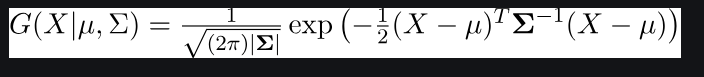

Trong ƒë√≥, ùí∞ l√† vector d chi·ªÅu g·ªçi l√† vector gi√° tr·ªã th·ª±c v√† ‚àë l√† ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai.

Gi·∫£ s·ª≠ c√≥ K c·ª•m th√¨ gi√° tr·ªã Œº v√† ‚àë c≈©ng ph·∫£i ƒë∆∞·ª£c ∆∞·ªõc t√≠nh cho m·ªói K.

Trong m√¥ h√¨nh n√†y, s·ª≠ d·ª•ng thu·∫≠t to√°n EM (Expectation-Maximization) ƒë·ªÉ c·∫≠p nh·∫≠t d·∫ßn d·∫ßn nghi·ªám cho b√†i to√°n.

Trong thu·∫≠t to√°n EM ch√∫ng ta li√™n t·ª•c th·ª±c hi·ªán c√°c v√≤ng l·∫∑p m√† m·ªói v√≤ng l·∫∑p bao g·ªìm hai b∆∞·ªõc hu·∫•n luy·ªán ch√≠nh:

* E-Step: ∆Ø·ªõc l∆∞·ª£ng ph√¢n ph·ªëi c·ªßa bi·∫øn ·∫©n th·ªÉ hi·ªán ph√¢n ph·ªëi x√°c su·∫•t c·ªßa c√°c c·ª•m t∆∞∆°ng ·ª©ng v·ªõi d·ªØ li·ªáu v√† b·ªô tham s·ªë ph√¢n ph·ªëi.

* M-Step: T·ªëi ƒëa ho√° ph√¢n ph·ªëi x√°c su·∫•t ƒë·ªìng th·ªùi (join distribution probability) c·ªßa d·ªØ li·ªáu v√† bi·∫øn ·∫©n.

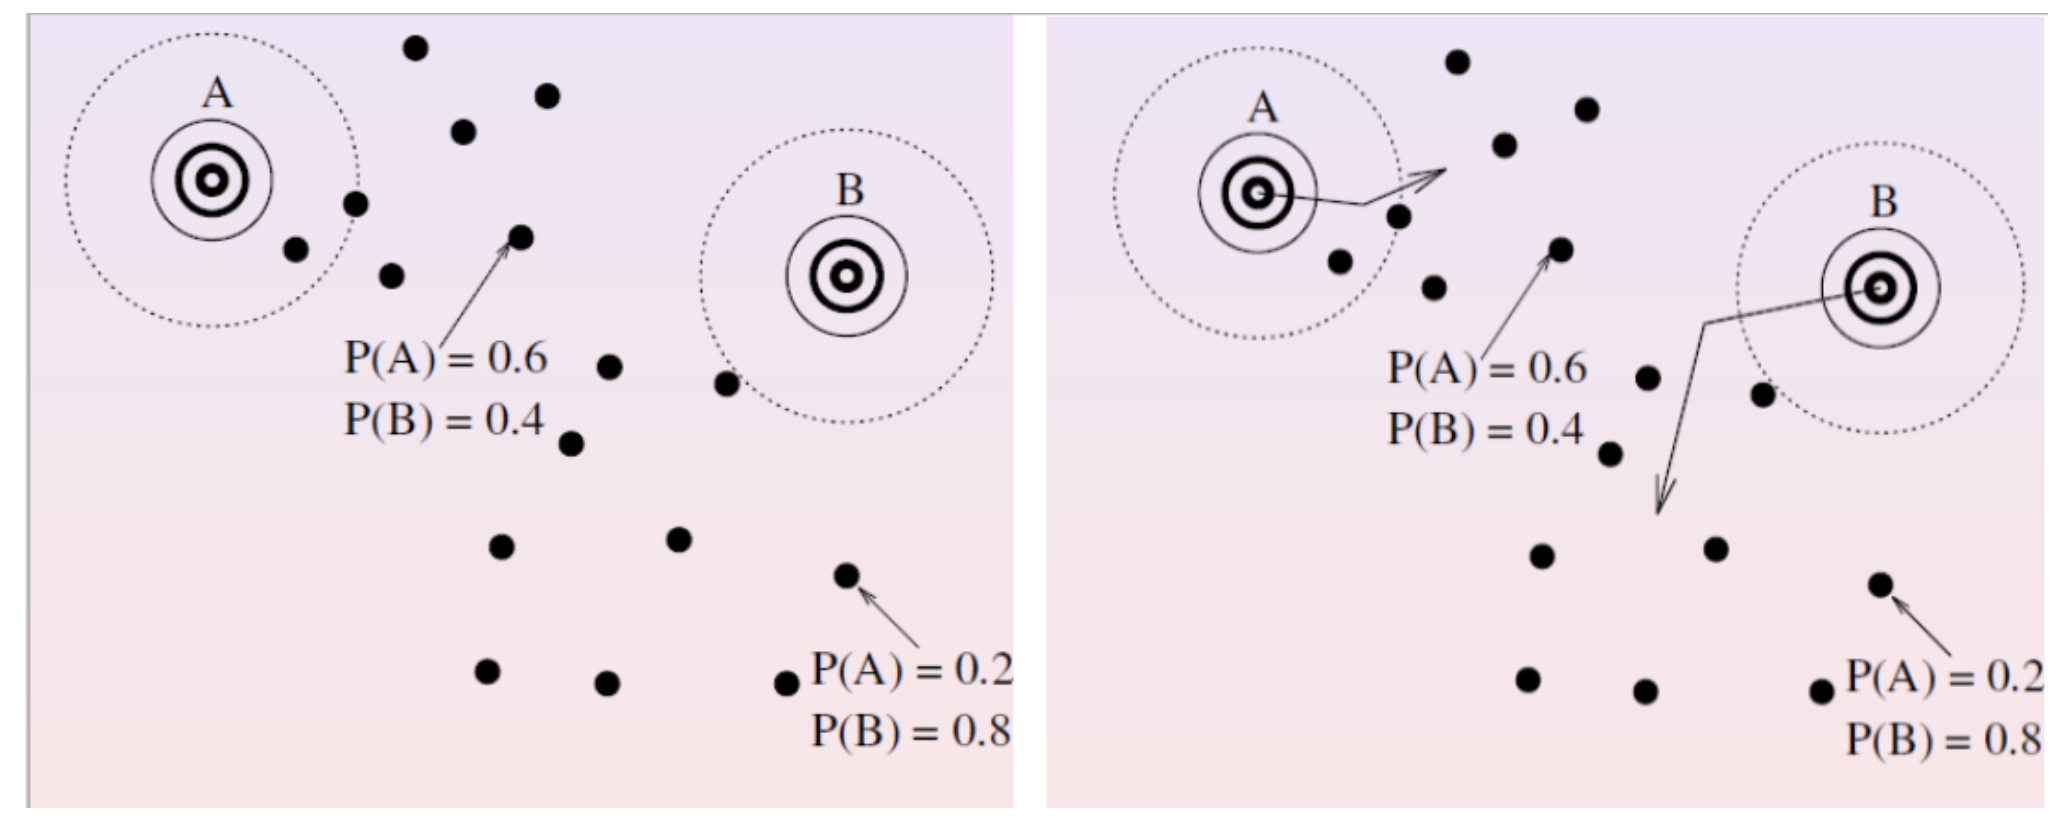